In [1]:
import numpy as np
import matplotlib.pylab as plt
plt.rcParams["font.size"] = 30

In [2]:
PARAMS = [1, 10]

In [3]:
def kernel(xa, xb, params):
    return params[0] * np.exp( -0.5 * params[1] * np.subtract.outer(xa, xb)**2)

# 予測分布の平均値と分散
def predicted_statistics(x_new, x, y, params):
    B = kernel(x_new, x, params)
    C = kernel(x, x, params)
    A = kernel(x_new, x_new, params)
    mu = np.linalg.inv(C).dot(B.T).T.dot(y)
    cov = A - B.dot(np.linalg.inv(C).dot(B.T))
    # 平均値と標準偏差を返す。
    return(mu.squeeze(), np.sqrt(cov.squeeze()))

In [4]:
# -3から3までの間でxの値を等間隔に生成する。
xs = np.arange(-3, 3, step=0.01)
xs.shape

(600,)

In [5]:
# カーネルを作成する。
cov = kernel(xs, xs, PARAMS)
print("共分散行列", cov.shape)

# 多次元０ベクトル
mu = np.zeros(xs.shape[0])
print("平均ベクトル", mu.shape)

共分散行列 (600, 600)
平均ベクトル (600,)


In [6]:
# 平均値0, 共分散行列Kの多次元正規分布を作り、xに対応するyを作る。
ys = np.random.multivariate_normal(mu, cov, 1).squeeze()
print(ys.shape)

(600,)


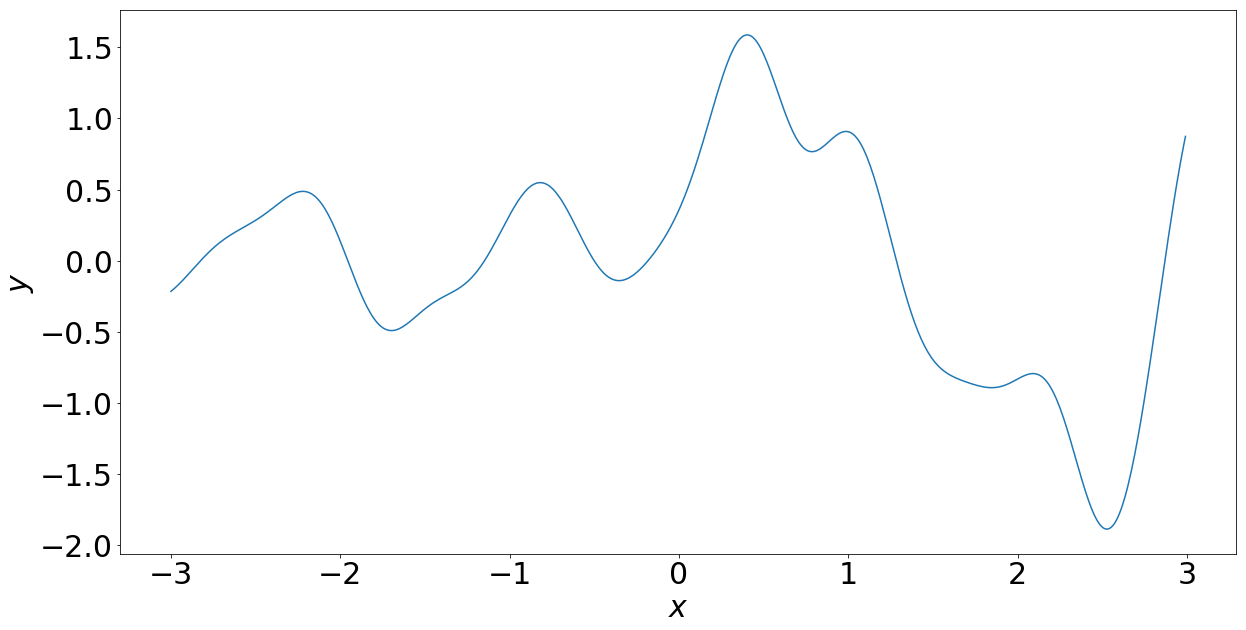

In [7]:
# 描画する。
plt.figure(figsize=(20, 10))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.plot(xs, ys)
plt.show()

In [8]:
# データ間引く
size = xs.shape[0]
interval = 60
tmp = list(range(0, size, interval))
print(tmp)

sampled_xs = xs[tmp]
sampled_ys = ys[tmp]


[0, 60, 120, 180, 240, 300, 360, 420, 480, 540]


In [9]:
len(sampled_xs)

10

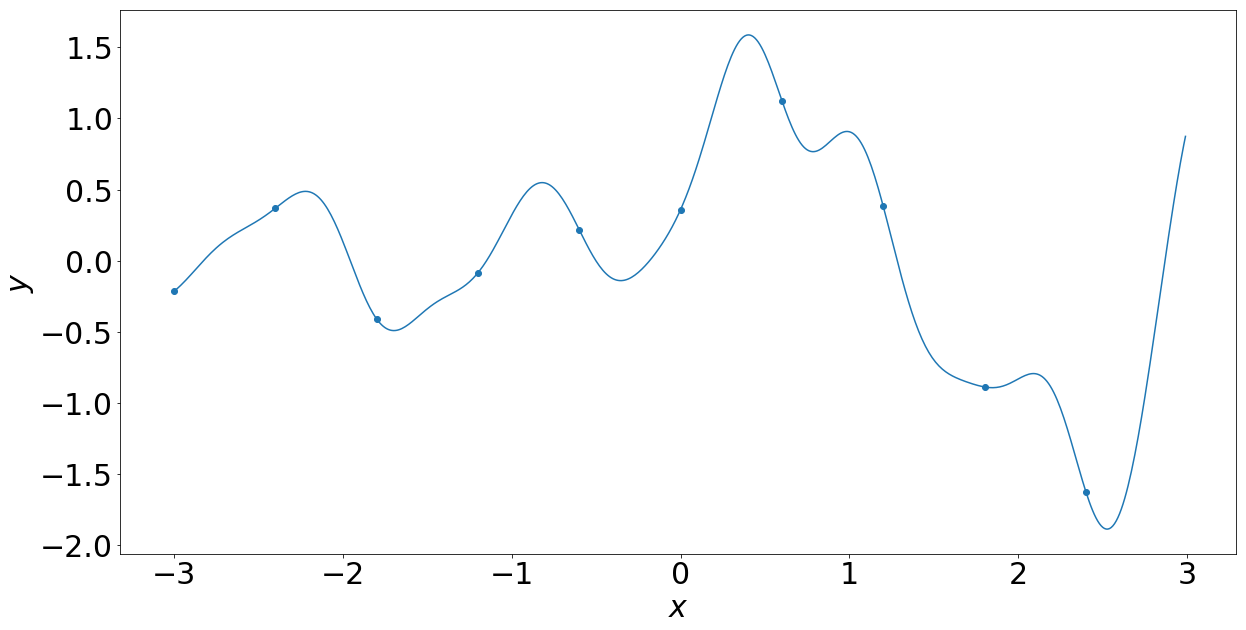

In [10]:
# 描画する。
plt.figure(figsize=(20, 10))
plt.plot(xs, ys)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.scatter(sampled_xs, sampled_ys)
plt.show()

In [11]:
# sampled_xs, sampled_ysを観測値として予測する。
# 予測したいx座標
x_pred = np.linspace(-3, 3, 1000)

# 平均値を
predictions = [predicted_statistics(i, sampled_xs, sampled_ys, PARAMS) for i in x_pred]
    

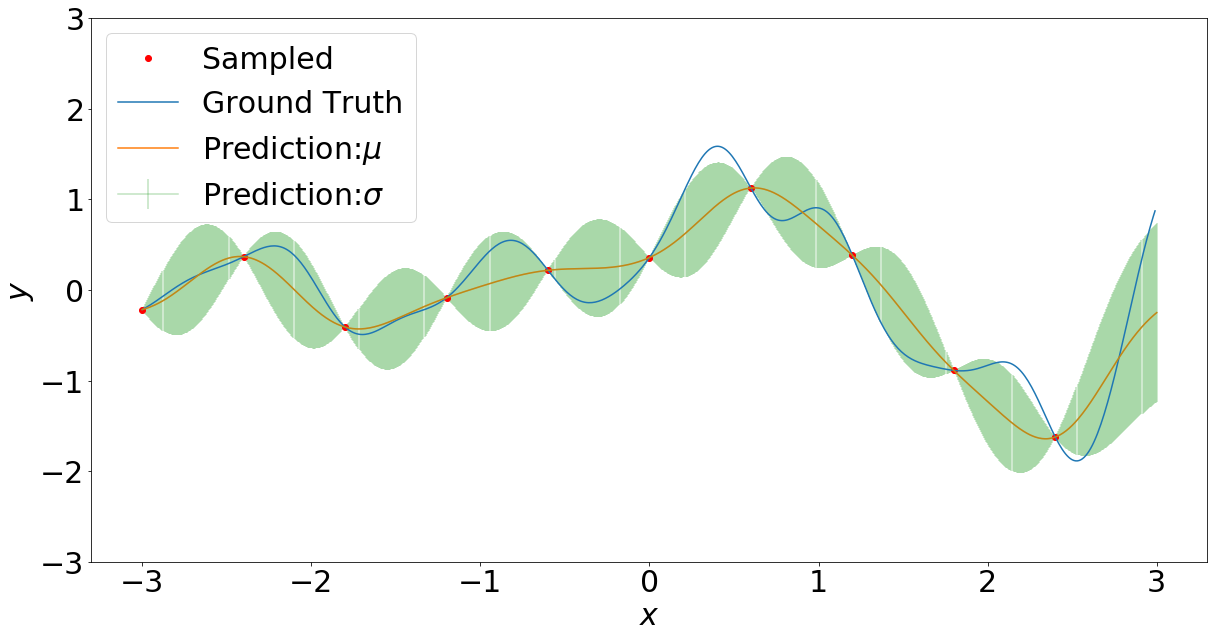

In [13]:
y_pred, sigmas = np.transpose(predictions)
plt.figure(figsize=(20, 10))
plt.plot(sampled_xs, sampled_ys, "ro", label="Sampled")
plt.plot(xs, ys, label="Ground Truth")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.plot(x_pred, y_pred, label="Prediction:$\mu$")
plt.errorbar(x_pred, y_pred, yerr=sigmas, label="Prediction:$\sigma$", alpha = 0.3)
plt.ylim(-3, 3)
plt.legend(loc="best")
plt.show()

何をしたのか？
- カーネルを与える。
- このカーネルを持つガウス過程を生成する。
- 得られた点列を間引いて観測値とみなす。
- 同じカーネルを用いて未知の値のy値と標準偏差を予測する。

本来の解析手順は
- データが与えられる。
- パラメータを持つカーネルを設定する。
- パラメータをベイズ推定する。